Пусть выборка X это случайные числа [0;20]. А Y это удвоенные X, сгенерированные с некоторым шумом в [-6;6].

In [110]:
import numpy as np

#Сгенерируем 120 обектов у каждого объекта будет по 1 признаку, полученный случайным образом rand()
X = np.array(sorted([20*x for x in np.random.rand(120,1)]))
#np.random.rand(120,1) - 120 строк по 1 столбцу случайно сгенерированные
#Каждый  сгенерированный x * 20, так как генерируются числа [0.(1);0.(9)], поэтому домножаем на 20


#Сгенерируем таргет относительно датасета X
Y = np.array([2*el + np.random.choice([-1,1]) * 6 * np.random.rand() for el in X])
#Пройдемся по всем эллементам выборки X (for el in X)
#Добавим некоторый шум (np.random.choice([-1,1]) * 6 * np.random.rand()) - "Генерим [-1;1] и далее домножаем на 6 с учетом рандомного коэф [0.(1);0.(9)]"

In [114]:
X[-10:]

array([[18.7537928 ],
       [18.84204644],
       [18.8628346 ],
       [18.96783687],
       [19.17561219],
       [19.41309973],
       [19.43305317],
       [19.48762134],
       [19.60745049],
       [19.93875561]])

In [84]:
Y[-10:]

array([[42.02936315],
       [32.57294886],
       [36.86990716],
       [36.29477103],
       [33.89251887],
       [41.62169478],
       [38.05122188],
       [43.51828884],
       [44.7197525 ],
       [38.89533257]])

In [115]:
#Разобъем нашу выборку на train И test c помощью sklearn
from sklearn.model_selection import train_test_split


#train_test_split(X, Y, test_size=0.4) - вернет 4 массива X and Y тест и трейн соотвественно
#0.4 есть 40% которые отложутся в тест и остальные 60 в трейн соответственно

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)    


#Выведем размеры массивов
#np.ndarray.shape — это свойство Numpy, которое возвращает кортеж размеров массива.
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((72, 1), (48, 1), (72, 1), (48, 1))

In [116]:
#Сохраним упорядоченные индексы наших эллементов что пригодится при визуализациии
#reshape - определяет новую форму массива без изменения данных reshape(строки,столбцы)
#argsort - индеректная сортировка эллементов массива
index_argsort = np.argsort(X_train.reshape(72,))

In [117]:
#Построим простую линейную модель
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
#fit_intercept - определяет необходимо ли добавлять свободную переменную в нашу модель

#Построим модель типа a(x) = b1 * d

model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

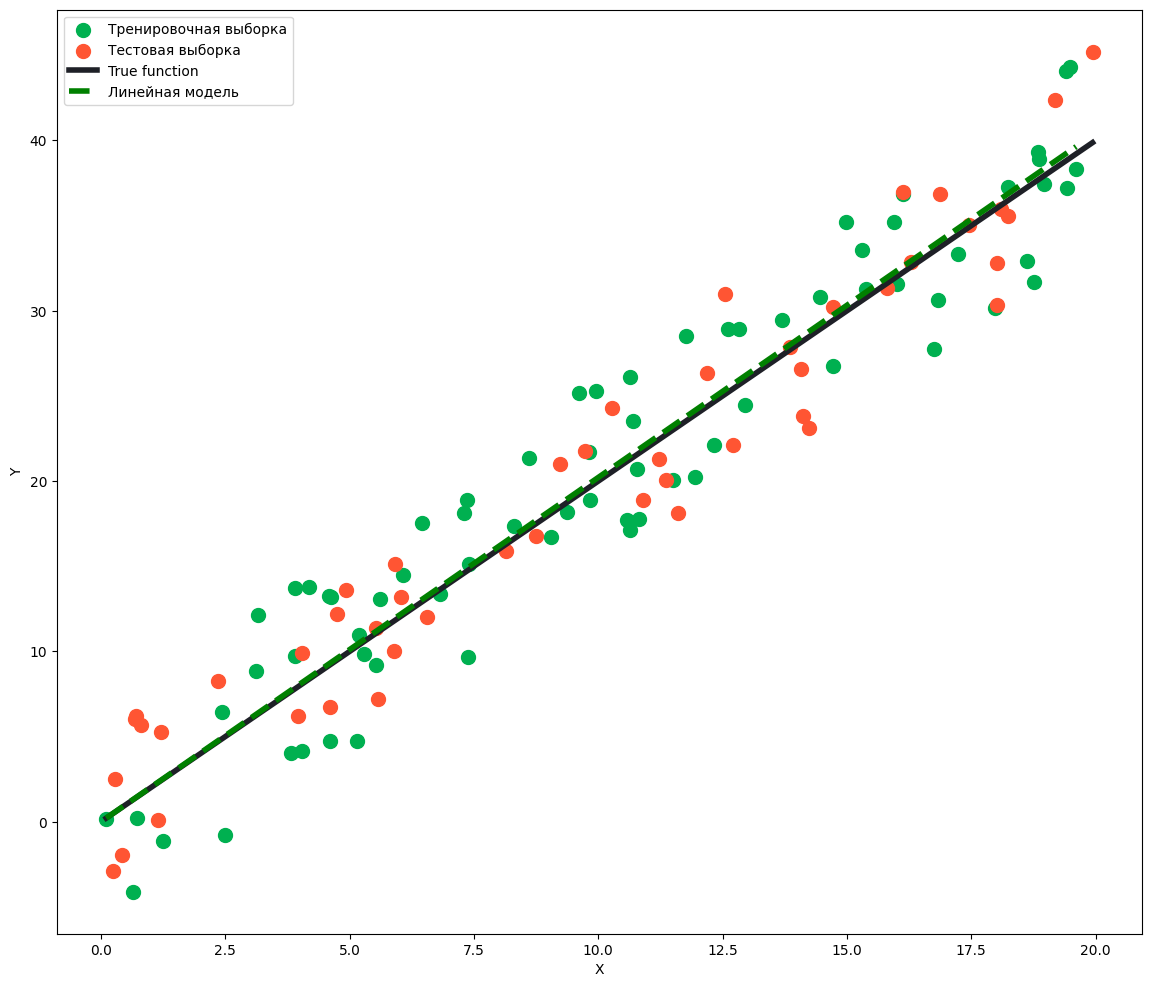

In [118]:
import matplotlib.pyplot as plt

#Создание полотна
fig = plt.figure()
fig.set_size_inches(14, 12)

#Отметим точки на полотне
plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)

#Линия как наши данные действительно распеределены
#А именно первоначальные координаты X соотносим с удвоеными, именно Y
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)



#Обученная модель, где отсортированные X_train, по Y(таргеты полученной модели)
plt.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--g', linewidth=4)


#Получается что у нас два плота, первый отображает какая идельная модель должна получится, а вторая(пунктир) это наша обученная





plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()



#Вывод: подбирая структуру нашей линейной модели, мы угадали функциональную форму нашей обученной модели, а именно как таргеты зависят от наших объетов

#Хорошая обобщающая способность  


In [119]:
model.coef_
#Коэфициент нашей модели, близкий к числу 2, то что и ожидали получить 

array([[2.02166635]])

In [120]:
#Построем полиномианльную модель a(x) = b1*d + b2*d^2 + b3*d^3 + ... + b25 * d^25 + b0 


#Возьмем  наш X_train
X_pol = X_train.copy()


#Переработаем следующим образом 
for k in range(2, 25):
    X_pol = np.append(X_pol,
                      np.array([x**k for x in X_pol[:, 0]]).reshape(72, -1),
                      axis=1)


In [121]:
X_pol[0]
#Получили массив з 25 столбцов X_pol
X_pol.shape

(72, 24)

In [122]:
#Построим полиномиальную модель
model_pol = LinearRegression()
model_pol.fit(X_pol, Y_train)

LinearRegression()

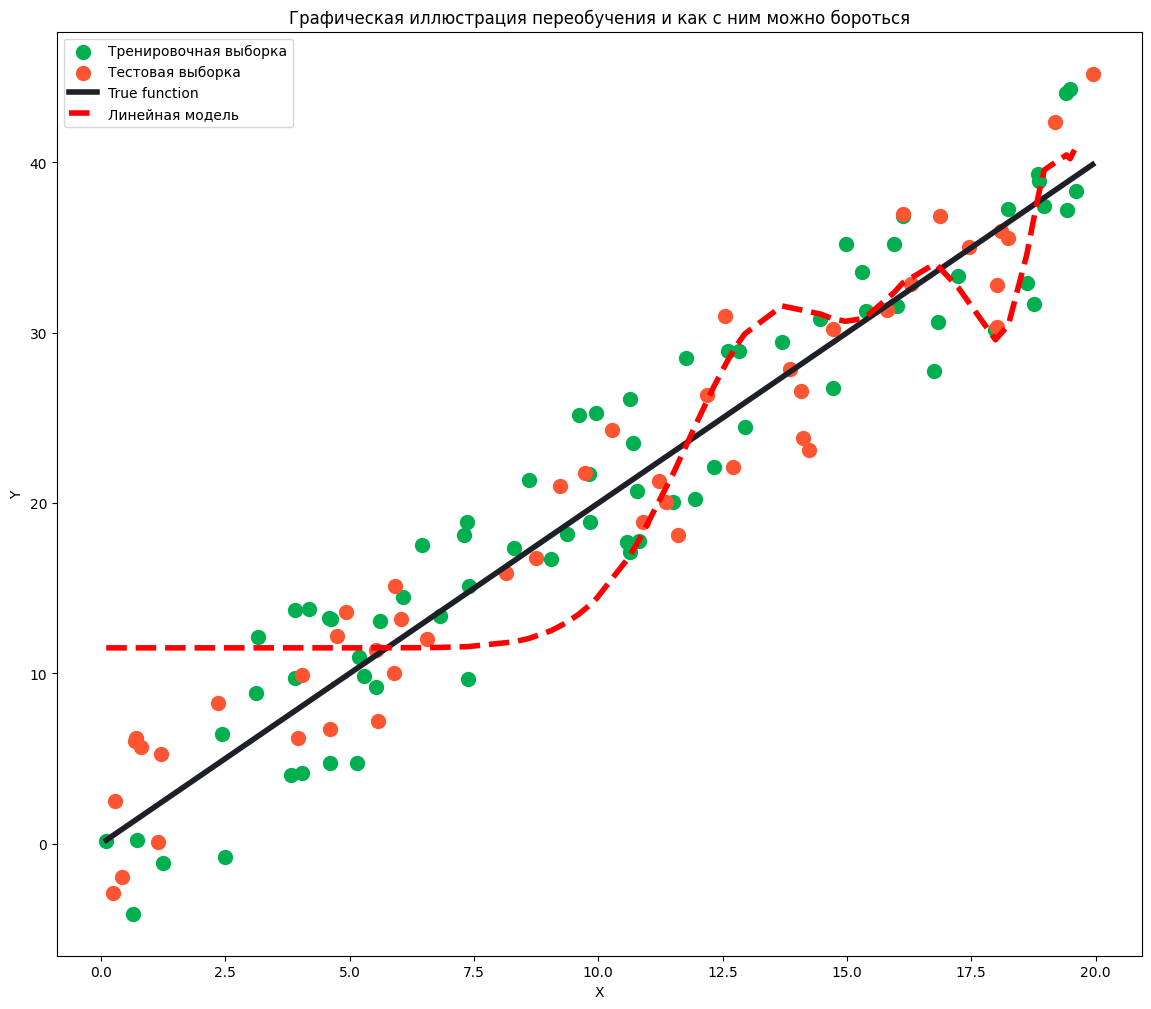

In [123]:
import matplotlib.pyplot as plt


fig = plt.figure()
fig.set_size_inches(14, 12)


plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
#plt.plot(X_train[index_argsort], 
         #model_just_linear.predict(X_train[index_argsort]),
         #'--g', linewidth=4)
plt.plot(X_train[index_argsort], 
         model_pol.predict(X_pol[index_argsort]),
         '--r', linewidth=4)


plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], 
            loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Графическая иллюстрация переобучения и как с ним можно бороться')

plt.show()

In [124]:
#Посмотрим среднюю крадратичную ошибку на первой линейной модели
np.mean((model.predict(X_train) - Y_train)**2)

12.573512239057699

In [125]:
#Оценим ошибку на тестовой выборке
np.mean((model.predict(X_test) - Y_test)**2)

9.761117304240424

In [126]:
#Также оценим качество полиномианльной модели на трейне
np.mean((model_pol.predict(X_pol) - Y_train)**2)

30.824235923059923

In [127]:
#Но как полиномиальная переученная покажет себя на тесте??

X_pol_test = X_test.copy()

for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, 
                           np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1),
                           axis=1)
    


np.mean((model_pol.predict(X_pol_test)-Y_test)**2)

ValueError: X has 25 features, but LinearRegression is expecting 24 features as input.